0.3566666666666669

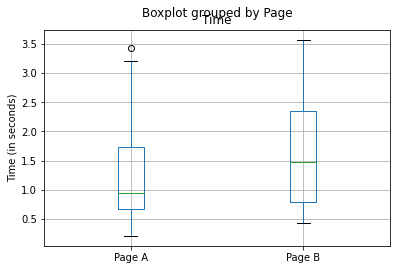

In [2]:
import pandas as pd
import numpy as np
session_times = pd.read_csv('web_page_data.csv')

ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
# plt.suptitle('')

mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a



0.145

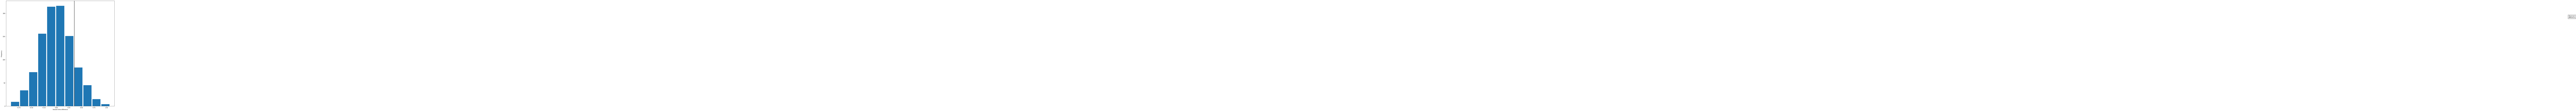

In [3]:
## Permutation test
import matplotlib.pyplot as plt
import random
# sample witohut replacement nB indices and assign them to group B
# remaining nA indices assigned to group A
# return the difference b/w the two means

def perm_func(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n),nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

perm_diffs = [perm_func(session_times.Time, 21, 15) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(15,15))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time difference')
ax.set_ylabel('Frequency')

np.mean(perm_diffs > mean_b - mean_a)

Outcome       PriceA   PriceB  
Conversion     200      182  
No Conv.      23,539   22,406  

Price A converts almost 5% better than price B (0.8425% = 200/(23539+200)*100, versus 0.8057% = 182/(22406+182)*100— a difference of 0.0368 percentage points), big enough to be meaningful in a high-volume business.


Observed difference: 0.0368%


Text(0, 0.5, 'Frequency')

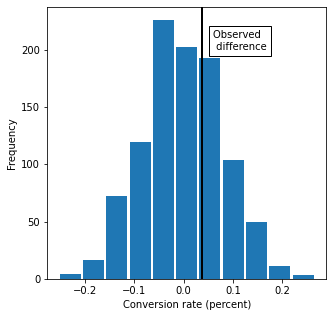

In [4]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588) 
print (f'Observed difference: {obs_pct_diff:.4f}%') 

conversion = [0] * 45945 
conversion.extend([1] * 382) 
conversion = pd.Series(conversion) 
perm_diffs = [100 * perm_func(conversion, 23739, 22588) for _ in range(1000)] 
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.hist(perm_diffs, bins=11, rwidth=0.9) 
ax.axvline(x=obs_pct_diff, color='black', lw=2) 
ax.text(0.06, 200, 'Observed \n difference', bbox={'facecolor':'white'}) 
ax.set_xlabel('Conversion rate (percent)') 
ax.set_ylabel('Frequency')

In [28]:
# CALCULATE P-VALUE

p_val = np.mean([diff > obs_pct_diff for diff in perm_diffs])
print(p_val)

0.352


Expect this extreme of a result by random chance 35% of the time 

With a binomial distribution we don't need to run a permutation test  
We can approximate the p-value instead



In [8]:
import scipy.stats as stats

res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, session_times[session_times.Page == 'Page B'].Time, equal_var=False)

print(f'p-value for single sided test: {res.pvalue / 2:.4f}')


p-value for single sided test: 0.1408
